In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#data = pd.read_csv('cervical-cancer.csv');
data = pd.read_csv('risk_factors_cervical_cancer.csv');


#資料欄位與型態
data.info()

data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0


In [52]:
# #刪除不需要的欄位
# data.drop(['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies', 'Smokes', 
#                 'Smokes (years)', 'Smokes (packs/year)','Hormonal Contraceptives','Hormonal Contraceptives (years)','IUD','IUD (years)',
#           'STDs','STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis',
#           'STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B',
#            'STDs:HPV','STDs: Number of diagnosis','STDs: Time since first diagnosis','STDs: Time since last diagnosis',
#            'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Schiller'], axis=1, inplace=True)


# #data.drop(data.columns[[-1, 0]], axis=1, inplace=True)
# data.info()
# data.head(3)

In [53]:
data = data.replace("?",0)
#資料欄位與型態
data=pd.DataFrame(data,dtype=np.float)


<ipython-input-53-7e193f668e05>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data=pd.DataFrame(data,dtype=np.float)


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    float64
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [55]:
Biopsy_all = list(data.shape)[0]
Biopsy_categories = list(data['Biopsy'].value_counts())

print("切片檢查資料筆數{}, 惡性{}筆, 良性{}筆".format(Biopsy_all, Biopsy_categories[1], Biopsy_categories[0]))

切片檢查資料筆數858, 惡性55筆, 良性803筆


In [56]:
#取特徵欄位
#features_mean= list(data.columns[1:5])
# features_mean=["Smokes","Hormonal Contraceptives","IUD","STDs"]
features_mean=["Age","Smokes","Smokes (years)","Hormonal Contraceptives","IUD","STDs"]

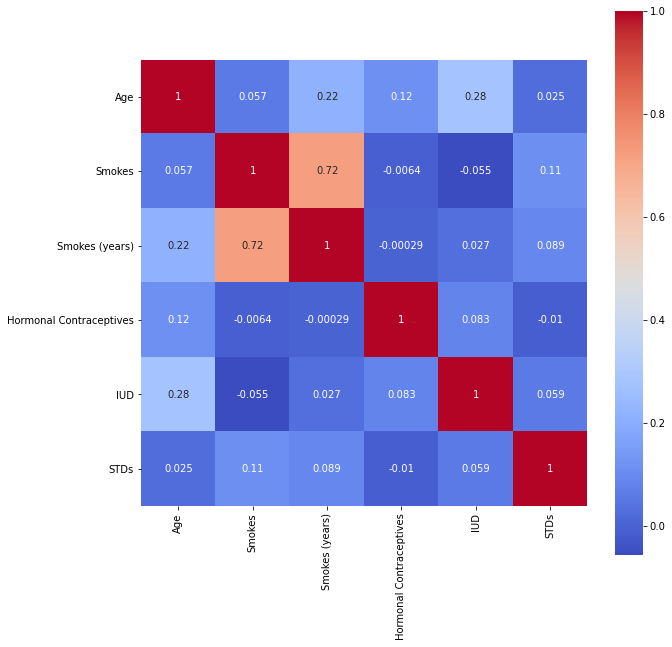

In [57]:
#計算correlation

#Citology
#Biopsy
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

0      blue
1      blue
2      blue
3      blue
4      blue
       ... 
853    blue
854    blue
855    blue
856    blue
857    blue
Name: Biopsy, Length: 858, dtype: object


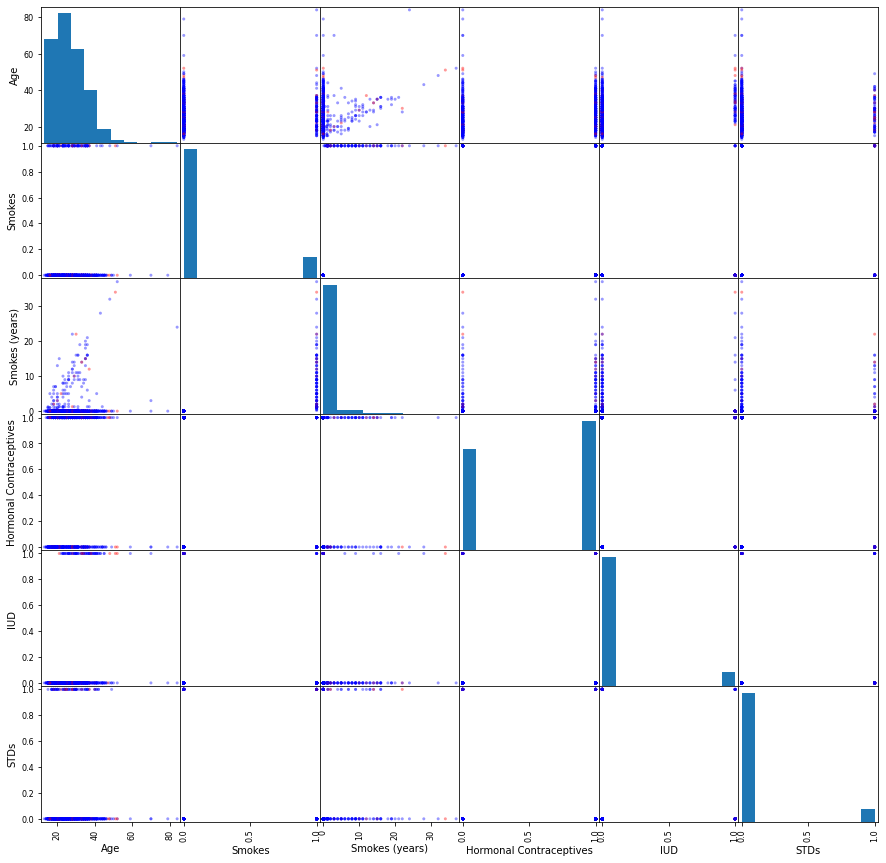

In [58]:
#M:Malignant
#B:Benign
color_dic = {0:'blue', 1:'red'}
colors = data['Biopsy'].map(lambda x: color_dic.get(x))

print(colors)
# # #用於比較惡性與良性腫瘤於這些特徵欄位的資料分佈
# sm = pd.plotting.scatter_matrix(data[features_mean], c=np.squeeze(colors), alpha=0.4, figsize=((15,15)));
sm = pd.plotting.scatter_matrix(data[features_mean], c=colors, alpha=0.4, figsize=((15,15)))
plt.show()

C:\Users\reach\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\reach\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\reach\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

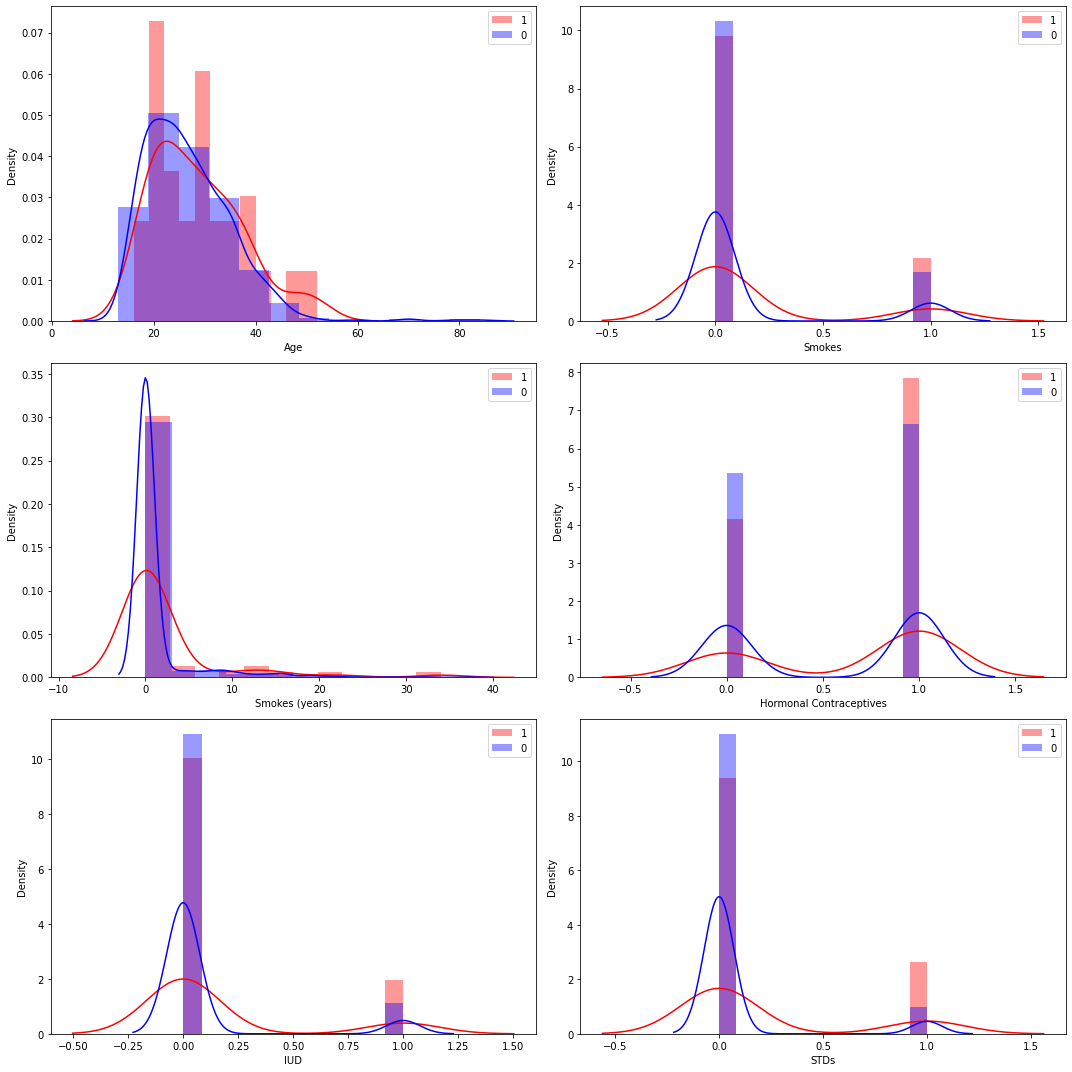

In [59]:
#用於比較惡性與良性腫瘤於這些特徵欄位的資料分佈

bins = 12
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(data[data['Biopsy']==1][feature], bins=bins, color='red', label='1');
    sns.distplot(data[data['Biopsy']==0][feature], bins=bins, color='blue', label='0');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

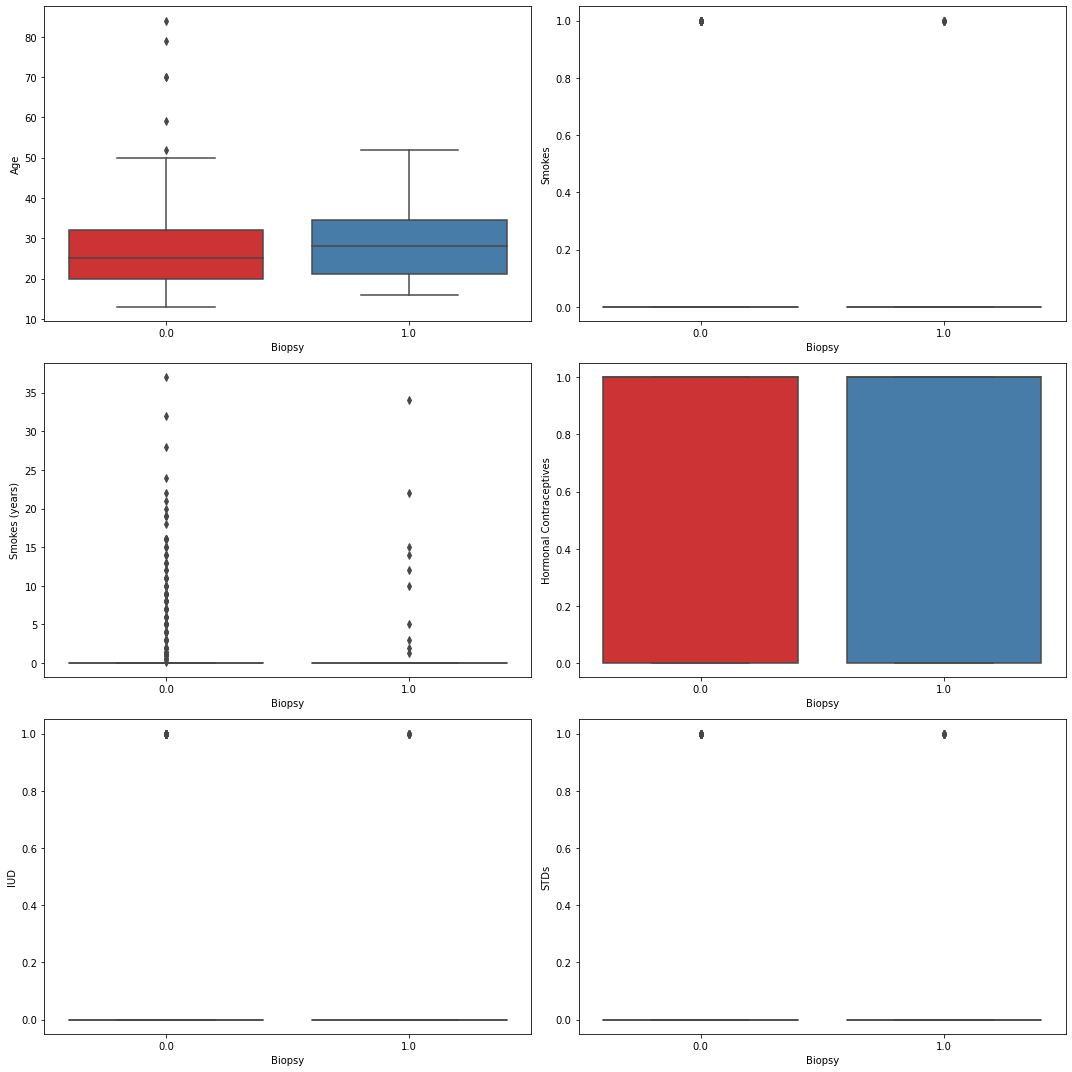

In [60]:
#用於比較惡性與良性腫瘤於這些特徵欄位的資料分佈

plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='Biopsy', y=feature, data=data, palette="Set1")

plt.tight_layout()
plt.show()

In [61]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import time

#特徵選擇
#features_mean=["Smokes","Hormonal Contraceptives","IUD","STDs"]
# features_mean = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs']
features_mean=["Age","Smokes","Smokes (years)","Hormonal Contraceptives","IUD","STDs"]
y=['Biopsy']
# diag_map = {'1':1, '0':0}
# data['Biopsy'] = data['Biopsy'].map(diag_map)


X = data.loc[:,features_mean]
y = data.loc[:, y]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
cvs_all = []

In [62]:
print(y)

     Biopsy
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
..      ...
853     0.0
854     0.0
855     0.0
856     0.0
857     0.0

[858 rows x 1 columns]


In [63]:
#選擇模型 
#隨機梯度下降演算法

from sklearn.linear_model import SGDClassifier

start = time.time()

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


SGD Classifier Accuracy: 93.60%
Cross validation score: 93.59% (+/- 0.04%)
Execution time: 0.090358 seconds 



C:\Users\reach\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

In [64]:
#Support Vector Machines

from sklearn.svm import SVC, NuSVC, LinearSVC

start = time.time()

clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = NuSVC(nu=0.1)
clf.fit(X_train, y_train)
prediciton = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("NuSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = LinearSVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("LinearSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

C:\Users\reach\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

SVC Accuracy: 93.60%
Cross validation score: 93.59% (+/- 0.04%)
Execution time: 0.29109 seconds 



C:\Users\reach\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\re

NuSVC Accuracy: 93.60%
Cross validation score: 50.60% (+/- 52.75%)
Execution time: 0.26248 seconds 



C:\Users\reach\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\reach\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LinearSVC Accuracy: 93.60%
Cross validation score: 93.59% (+/- 0.04%)
Execution time: 0.46751 seconds 



C:\Users\reach\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\reach\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [65]:
#Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

C:\Users\reach\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 93.60%
Cross validation score: 93.59% (+/- 0.04%)
Execution time: 0.20751 seconds 



C:\Users\reach\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [66]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

C:\Users\reach\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 87.21%
Cross validation score: 83.93% (+/- 14.33%)
Execution time: 0.20949 seconds 



C:\Users\reach\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

In [67]:
# Forest and tree methods

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

start = time.time()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Extra Trees Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

<ipython-input-67-847c9eddf6d2>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

Random Forest Accuracy: 93.02%
Cross validation score: 92.07% (+/- 2.04%)
Execution time: 2.2177 seconds 



<ipython-input-67-847c9eddf6d2>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\reach\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

Extra Trees Accuracy: 92.44%
Cross validation score: 91.84% (+/- 2.08%)
Execution time: 1.3975 seconds 

Dedicion Tree Accuracy: 92.44%
Cross validation score: 91.72% (+/- 4.30%)
Execution time: 0.080772 seconds 



In [68]:
#Using the selected features

X = data.loc[:,features_mean]
y = data.loc[:, 'Biopsy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_selection = []
cvs_selection = []

In [69]:
#以下同樣的演算法再跑一次

from sklearn.linear_model import SGDClassifier

start = time.time()

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

from sklearn.svm import SVC, NuSVC, LinearSVC

start = time.time()

clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

start = time.time()

clf = NuSVC(nu=0.1)
clf.fit(X_train, y_train)
prediciton = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("NuSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

start = time.time()

clf = LinearSVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("LinearSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

start = time.time()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

start = time.time()

clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Extra Trees Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

start = time.time()

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

SGD Classifier Accuracy: 93.60%
Cross validation score: 93.59% (+/- 0.04%)
Execution time: 0.066398 seconds 

SVC Accuracy: 93.60%
Cross validation score: 93.59% (+/- 0.04%)
Execution time: 0.13905 seconds 

NuSVC Accuracy: 93.60%
Cross validation score: 50.60% (+/- 52.75%)
Execution time: 0.1784 seconds 



C:\Users\reach\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\reach\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\reach\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\reach\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\reach\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

LinearSVC Accuracy: 58.72%
Cross validation score: 93.59% (+/- 0.04%)
Execution time: 0.29519 seconds 

Accuracy: 93.60%
Cross validation score: 93.59% (+/- 0.04%)
Execution time: 0.13088 seconds 

Accuracy: 87.21%
Cross validation score: 83.93% (+/- 14.33%)
Execution time: 0.044015 seconds 

Random Forest Accuracy: 93.02%
Cross validation score: 92.07% (+/- 2.04%)
Execution time: 1.7384 seconds 

Extra Trees Accuracy: 92.44%
Cross validation score: 91.73% (+/- 2.37%)
Execution time: 1.3442 seconds 

Dedicion Tree Accuracy: 92.44%
Cross validation score: 91.95% (+/- 3.90%)
Execution time: 0.059287 seconds 



In [70]:
diff_accuracy = list(np.array(accuracy_selection) - np.array(accuracy_all))
diff_cvs = list(np.array(cvs_selection) - np.array(cvs_all))

d = {'accuracy_all':accuracy_all, 'accuracy_selection':accuracy_selection, 'diff_accuracy':diff_accuracy, 
     'cvs_all':cvs_all, 'cvs_selection':cvs_selection, 'diff_cvs':diff_cvs,}

index = ['SGD', 'SVC', 'NuSVC', 'LinearSVC', 'KNeighbors', 'GaussianNB', 'RandomForest', 'ExtraTrees', 'DecisionTree']

df = pd.DataFrame(d, index=index)

In [71]:
df

,accuracy_all,accuracy_selection,diff_accuracy,cvs_all,cvs_selection,diff_cvs
SGD,0.936047,0.936047,0.000000,0.935897,0.935897,0.000000
SVC,0.936047,0.936047,0.000000,0.935897,0.935897,0.000000
NuSVC,0.936047,0.936047,0.000000,0.505977,0.505977,0.000000
LinearSVC,0.936047,0.587209,-0.348837,0.935897,0.935897,0.000000
KNeighbors,0.936047,0.936047,0.000000,0.935897,0.935897,0.000000
GaussianNB,0.872093,0.872093,0.000000,0.839256,0.839256,0.000000
RandomForest,0.930233,0.930233,0.000000,0.920740,0.920740,0.000000
ExtraTrees,0.924419,0.924419,0.000000,0.918414,0.917251,-0.001163
DecisionTree,0.924419,0.924419,0.000000,0.917204,0.919543,0.002339


In [72]:
#調整超參數
from sklearn.model_selection import GridSearchCV

X = data.loc[:,features_mean]
y = data.loc[:, 'Biopsy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
csv_all = []

start = time.time()

#超參數的範圍
parameters = {'priors':[[0.01, 0.99],[0.1, 0.9], [0.2, 0.8], [0.25, 0.75], [0.3, 0.7],[0.35, 0.65], [0.4, 0.6]]}

#多核心運算
clf = GridSearchCV(GaussianNB(), parameters, scoring = 'average_precision', n_jobs=-1)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

print("Best parameters: {0}".format(clf.best_params_))

Accuracy: 6.40%
Cross validation score: 9.81% (+/- 7.61%)
Execution time: 5.7099 seconds 

Best parameters: {'priors': [0.01, 0.99]}


In [73]:
start = time.time()

parameters = {'n_estimators':list(range(1,101)), 'criterion':['gini', 'entropy']}

clf = GridSearchCV(RandomForestClassifier(), parameters, scoring = 'average_precision', n_jobs=-1)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

print("Best parameters: {0} \n".format(clf.best_params_))

start = time.time()

clf = GridSearchCV(ExtraTreesClassifier(), parameters, scoring = 'average_precision', n_jobs=-1)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Extra Trees Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

print("Best parameters: {0} \n".format(clf.best_params_))

start = time.time()

#gini: 基尼不純度(CART)
#entropy: 資訊獲利 (ID3)
parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random']}

clf = GridSearchCV(DecisionTreeClassifier(), parameters, scoring = 'average_precision', n_jobs=-1)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

print("Best parameters: {0} \n".format(clf.best_params_))

Random Forest Accuracy: 92.44%
Cross validation score: 7.38% (+/- 2.74%)
Execution time: 222.78 seconds 

Best parameters: {'criterion': 'entropy', 'n_estimators': 3} 

Extra Trees Accuracy: 93.02%
Cross validation score: 6.91% (+/- 1.68%)
Execution time: 174.66 seconds 

Best parameters: {'criterion': 'gini', 'n_estimators': 9} 

Dedicion Tree Accuracy: 91.28%
Cross validation score: 9.32% (+/- 4.52%)
Execution time: 0.5247 seconds 

Best parameters: {'criterion': 'gini', 'splitter': 'random'} 

